In [1]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.3 MB/s eta 0:00:00


In [2]:
pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 47.9 MB/s eta 0:00:00


In [3]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# ORACULOS SIMPLES

## Ejemplo 1 de funcion $x_{1} \oplus x_{2}$

La función se define como:

$O_{f}|x_{1} x_{2}\rangle |y\rangle = |x_{1} x_{2}\rangle |y \oplus (x_{1} \oplus x_{2}) \rangle$



*   $x_{1}, x_{2} = 0,0$ aplicando $O_{f}$ tenemos $|0 0\rangle |0 \oplus (0 \oplus 0) \rangle = |00\rangle |0\rangle$.
*   $x_{1}, x_{2} = 0,1$ aplicando $O_{f}$ tenemos $|0 1\rangle |0 \oplus (0 \oplus 1) \rangle = |01\rangle |1\rangle$.
*   $x_{1}, x_{2} = 1,0$ aplicando $O_{f}$ tenemos $|1 0\rangle |0 \oplus (1 \oplus 0) \rangle = |10\rangle |1\rangle$.
*   $x_{1}, x_{2} = 1,1$ aplicando $O_{f}$ tenemos $|1 1\rangle |0 \oplus (1 \oplus 1) \rangle = |11\rangle |0\rangle$.



In [ ]:
# Crear un circuito cuántico con 3 qubits (2 qubits de entrada y 1 qubit ancilla)
qc = QuantumCircuit(3)

# Inicializar los qubits (opcional, depende de la configuración inicial deseada)
# qc.x(0)  # Por ejemplo, podemos inicializar x1 a |1>
# qc.x(1)  # Por ejemplo, podemos inicializar x2 a |1>
# qc.x(2)  # Inicializar y a |1> si es necesario

# Aplicar compuertas CNOT para implementar x1 ⊕ x2
qc.cx(0, 2)  # CNOT con x1 como control y y como objetivo
qc.cx(1, 2)  # CNOT con x2 como control y y como objetivo

# Agregar mediciones
qc.measure_all()

# Dibujar el circuito
qc.draw()

░ ┌─┐      
   q_0: ──■────────░─┤M├──────
          │        ░ └╥┘┌─┐   
   q_1: ──┼────■───░──╫─┤M├───
        ┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├┤ X ├─░──╫──╫─┤M├
        └───┘└───┘ ░  ║  ║ └╥┘
meas: 3/══════════════╩══╩══╩═
                      0  1  2

{'000': 1024}


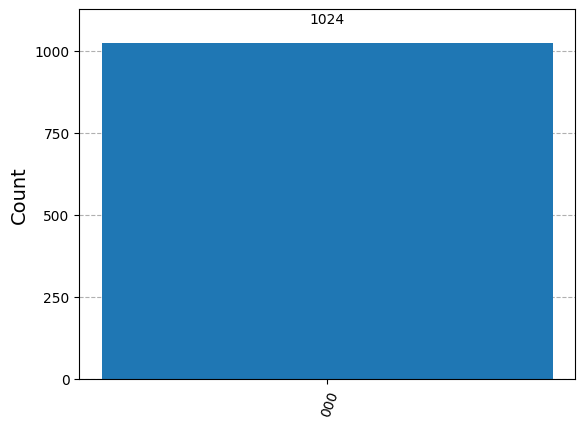

In [ ]:
# Simulador
simulator = AerSimulator()

# Compilar y ejecutar el circuito
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# Obtener y mostrar los resultados
counts = result.get_counts()
print(counts)
plot_histogram(counts)

## Ejemplo 2 de función $x_{1} \wedge x_{2}$

La función se define como:

$O_{f}|x_{1} x_{2}\rangle |y\rangle = |x_{1} x_{2}\rangle |y \oplus (x_{1} \wedge x_{2}) \rangle$



*   $x_{1}, x_{2} = 0,0$ aplicando $O_{f}$ tenemos $|0 0\rangle |0 \oplus (0 \wedge 0) \rangle = |00\rangle |y\rangle$.
*   $x_{1}, x_{2} = 0,1$ aplicando $O_{f}$ tenemos $|0 1\rangle |0 \oplus (0 \wedge 1) \rangle = |01\rangle |y\rangle$.
*   $x_{1}, x_{2} = 1,0$ aplicando $O_{f}$ tenemos $|1 0\rangle |0 \oplus (1 \wedge 0) \rangle = |10\rangle |y\rangle$.
*   $x_{1}, x_{2} = 1,1$ aplicando $O_{f}$ tenemos $|1 1\rangle |0 \oplus (1 \wedge 1) \rangle = |11\rangle |y \oplus 1\rangle$.

In [ ]:
# Crear un circuito cuántico con 3 qubits (2 qubits de entrada y 1 qubit ancilla)
qc = QuantumCircuit(3)

# Inicializar los qubits (opcional, depende de la configuración inicial deseada)
# qc.x(0)  # Por ejemplo, podemos inicializar x1 a |1>
# qc.x(1)  # Por ejemplo, podemos inicializar x2 a |1>
# qc.x(2)  # Inicializar y a |1> si es necesario

# Aplicar la compuerta Toffoli (CCNOT)
qc.ccx(0, 1, 2)

# Agregar mediciones
qc.measure_all()

# Dibujar el circuito
qc.draw()

NameError: name 'QuantumCircuit' is not defined

In [ ]:
# Simulador
simulator = AerSimulator()

# Compilar y ejecutar el circuito
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# Obtener y mostrar los resultados
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# ALGORITMO DEUTSCH-JOSZA

## Función balanceada de 3 qubits

In [ ]:
# Crear el circuito Deutsch-Josza
qc = QuantumCircuit(4, 4)
###
qc.x(3) # Registro para phase-kickback.
qc.barrier()
qc.h([0, 1, 2, 3])
# Oráculo para una función balanceada (paridad de unos)
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)
qc.h([0, 1, 2])
qc.measure([0, 1, 2], [0, 1, 2])
#qc.measure([3], [3])
qc.draw()

┌───┐ ░ ┌───┐     ┌───┐     ┌─┐           
q_0: ┤ X ├─░─┤ H ├──■──┤ H ├─────┤M├───────────
     ├───┤ ░ ├───┤  │  └───┘┌───┐└╥┘     ┌─┐   
q_1: ┤ X ├─░─┤ H ├──┼────■──┤ H ├─╫──────┤M├───
     ├───┤ ░ ├───┤  │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_2: ┤ X ├─░─┤ H ├──┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤ ░ ├───┤┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ┤ X ├─░─┤ H ├┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘ ░ └───┘└───┘└───┘└───┘ ║       ║  ║ 
c: 4/═════════════════════════════╩═══════╩══╩═
                                  0       1  2

Resultados para la función balanceada (paridad de unos): {'0000': 1024}


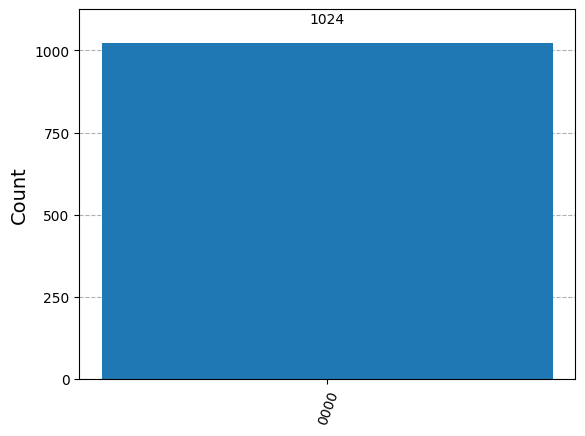

In [ ]:
# Ejecutar el circuito en un simulador AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts(compiled_circuit)

# Mostrar los resultados
print("Resultados para la función balanceada (paridad de unos):", counts)
plot_histogram(counts)

## Función de mayoria simple 4 qubits

In [ ]:
# Crear el circuito Deutsch-Josza con función Mayoría Simple
n = 4  # Número de qubits de entrada
qc = QuantumCircuit(n + 1, n)

# Inicializar el qubit ancilla en el estado |1⟩ y aplicar H para obtener |-> = (|0⟩ - |1⟩)/√2
qc.x(n)
qc.h(n)
qc.barrier()

# Inicializar los qubits (opcional, depende de la configuración inicial deseada)
#qc.x(0)  # Por ejemplo, podemos inicializar x0 a |1>
#qc.x(1)  # Por ejemplo, podemos inicializar x1 a |1>
#qc.x(2)  # Por ejemplo, podemos inicializar x2 a |1>
#qc.x(3)  # Por ejemplo, podemos inicializar x3 a |1>
#qc.barrier()

# Aplicar H a los primeros n qubits para ponerlos en superposición
qc.h(range(n))

# Oráculo para función Mayoría Simple:
# - Aplicamos puertas Toffoli (CCX) para verificar si al menos 3 qubits están en estado 1
qc.ccx(0, 1, n)
qc.ccx(0, 2, n)
qc.ccx(0, 3, n)
qc.ccx(1, 2, n)
qc.ccx(1, 3, n)
qc.ccx(2, 3, n)
qc.barrier()
# Aplicar H nuevamente a los primeros n qubits
qc.h(range(n))
qc.barrier()

# Medir los primeros n qubits
qc.measure(range(n), range(n))

# Visualizar el circuito
print(qc.draw())

                ░ ┌───┐                               ░ ┌───┐ ░ ┌─┐         
q_0: ───────────░─┤ H ├──■────■────■──────────────────░─┤ H ├─░─┤M├─────────
                ░ ├───┤  │    │    │                  ░ ├───┤ ░ └╥┘┌─┐      
q_1: ───────────░─┤ H ├──■────┼────┼────■────■────────░─┤ H ├─░──╫─┤M├──────
                ░ ├───┤  │    │    │    │    │        ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ───────────░─┤ H ├──┼────■────┼────■────┼────■───░─┤ H ├─░──╫──╫─┤M├───
                ░ ├───┤  │    │    │    │    │    │   ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ───────────░─┤ H ├──┼────┼────■────┼────■────■───░─┤ H ├─░──╫──╫──╫─┤M├
     ┌───┐┌───┐ ░ └───┘┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░──────┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─░───────░──╫──╫──╫──╫─
     └───┘└───┘ ░      └───┘└───┘└───┘└───┘└───┘└───┘ ░       ░  ║  ║  ║  ║ 
c: 4/════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                 0  1  2  3 

Resultados para la función Mayoría Simple: {'1110': 46, '1011': 77, '0001': 64, '1101': 62, '0011': 59, '0111': 74, '0010': 58, '0000': 62, '1010': 66, '0110': 67, '1000': 56, '1100': 57, '1111': 76, '1001': 68, '0101': 71, '0100': 61}


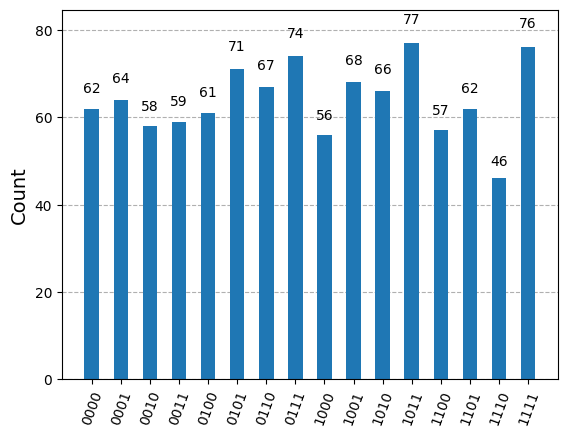

In [ ]:
# Ejecutar el circuito en el simulador AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# Obtener los resultados de la simulación
counts = result.get_counts(compiled_circuit)

# Mostrar los resultados
print("Resultados para la función Mayoría Simple:", counts)
plot_histogram(counts)

# Algoritmo de Grover

## Ejemplo #1 busqueda de estado $|1000\rangle$

In [8]:
# Crear el circuito cuántico con 4 qubits de entrada y 4 bits clásicos
qc = QuantumCircuit(4, 4)

# Aplicar H a todos los qubits para ponerlos en superposición
qc.h([0, 1, 2, 3])
qc.barrier()

# Oráculo para marcar el estado objetivo |0111⟩
# Aplicar X a los qubits para crear |1000⟩
qc.x([0, 1, 2])
qc.h(3)
qc.mcx([0, 1, 2], 3)  # Aplicar CCX (Toffoli) controlada en los primeros 3 qubits
qc.h(3)
qc.x([0, 1, 2])
qc.barrier()

# Difusión de Grover
qc.h([0, 1, 2, 3])
qc.x([0, 1, 2, 3])
qc.h(3)
qc.mcx([0, 1, 2], 3)  # Aplicar CCX (Toffoli) controlada en los primeros 3 qubits
qc.h(3)
qc.x([0, 1, 2, 3])
qc.h([0, 1, 2, 3])
qc.barrier()

# Medir los qubits
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# Visualizar el circuito
qc.draw()

┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐┌───┐          ┌───┐┌───┐      ░ ┌─┐      »
q_0: ┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─┤M├──────»
     ├───┤ ░ ├───┤  │  ├───┤ ░ ├───┤├───┤       │  ├───┤├───┤      ░ └╥┘┌─┐   »
q_1: ┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫─┤M├───»
     ├───┤ ░ ├───┤  │  ├───┤ ░ ├───┤├───┤       │  ├───┤├───┤      ░  ║ └╥┘┌─┐»
q_2: ┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫──╫─┤M├»
     ├───┤ ░ ├───┤┌─┴─┐├───┤ ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░  ║  ║ └╥┘»
q_3: ┤ H ├─░─┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──╫──╫──╫─»
     └───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  ║  ║  ║ »
c: 4/═════════════════════════════════════════════════════════════════╩══╩══╩═»
                                                                      0  1  2 »
«        
«q_0: ───
«        
«q_1: ───
«        
«q_2: ───
«     ┌─┐
«q_3: ┤M├
«     └╥┘
«c: 4/═╩═
«      3

Resultados para la búsqueda del número 7: {'0010': 34, '0000': 29, '0100': 20, '1111': 50, '0001': 34, '1100': 40, '0011': 36, '0111': 41, '1011': 39, '1101': 33, '1000': 480, '0110': 31, '1001': 41, '0101': 40, '1110': 42, '1010': 34}


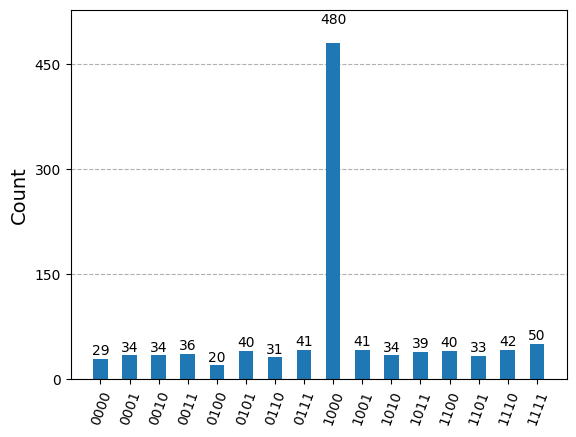

In [10]:
# Ejecutar el circuito en el simulador AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts(compiled_circuit)

# Mostrar los resultados
print("Resultados para la búsqueda del número 7:", counts)
plot_histogram(counts)

## Ejemplo #2 busqueda de estados 3 $|011\rangle$ y 5 $|101\rangle$

In [11]:
# Crear el circuito cuántico con 3 qubits de entrada y 3 bits clásicos
qc = QuantumCircuit(3, 3)

# Aplicar H a todos los qubits para ponerlos en superposición
qc.h([0, 1, 2])

# Oráculo para marcar los estados objetivo |011⟩ y |101⟩
# Estado |011⟩
qc.x(2)
qc.h(2)
qc.ccx(0, 1, 2)  # Aplicar Toffoli para marcar |011⟩
qc.h(2)
qc.x(2)

# Estado |101⟩
qc.x(1)
qc.h(2)
qc.ccx(0, 1, 2)  # Aplicar Toffoli para marcar |101⟩
qc.h(2)
qc.x(1)

# Difusión de Grover
qc.h([0, 1, 2])
qc.x([0, 1, 2])
qc.h(2)
qc.ccx(0, 1, 2)  # Aplicar Toffoli
qc.h(2)
qc.x([0, 1, 2])
qc.h([0, 1, 2])

# Medir los qubits
qc.measure([0, 1, 2], [0, 1, 2])

# Visualizar el circuito
qc.draw()

┌───┐                                   ┌───┐┌───┐               ┌───┐»
q_0: ┤ H ├────────────■───────────────────■──┤ H ├┤ X ├────────────■──┤ X ├»
     ├───┤            │  ┌───┐            │  ├───┤├───┤┌───┐       │  ├───┤»
q_1: ┤ H ├────────────■──┤ X ├────────────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├»
     ├───┤┌───┐┌───┐┌─┴─┐├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤»
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c: 3/══════════════════════════════════════════════════════════════════════»
                                                                           »
«     ┌───┐     ┌─┐      
«q_0: ┤ H ├─────┤M├──────
«     ├───┤     └╥┘┌─┐   
«q_1: ┤ H ├──────╫─┤M├───
«     ├───┤┌───┐ ║ └╥┘┌─┐
«q_2: ┤ X ├┤ H ├─╫──╫─┤M├
«     └───┘└───┘ ║  ║ └╥┘
«c: 3/═══════════╩══╩══╩═
«                0  1  2

Resultados para la búsqueda de los números 3 y 5: {'101': 497, '011': 527}


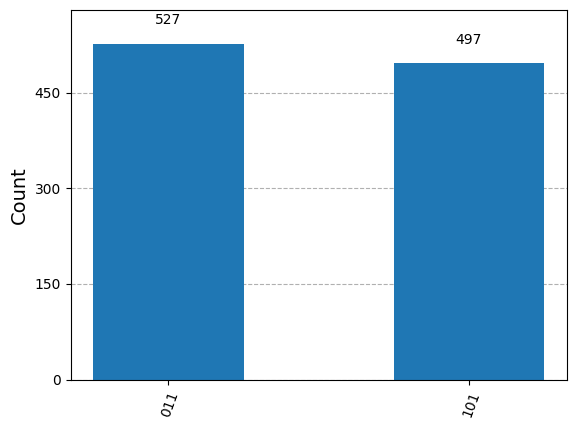

In [12]:
# Ejecutar el circuito en el simulador AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts(compiled_circuit)

# Mostrar los resultados
print("Resultados para la búsqueda de los números 3 y 5:", counts)
plot_histogram(counts)